### Data Analysis/Data Visualization Report: Bike Ride Trends and Biker Types of Ford GoBike System April, 2019


#### Investigation  overview
In this investigation, I will to look at the bike ride trends and biker type of the bay Area bike share system. The main focus was on biking duration, the time (weekday, hour), and the bike types.

##### Dataset Ocerview
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data consists of around 239k records for the trips

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [26]:
df = pd.read_csv('clean_master_file.csv')

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222660 entries, 0 to 222659
Data columns (total 27 columns):
duration_sec               222660 non-null int64
start_time                 222660 non-null object
end_time                   222660 non-null object
start_station_id           222660 non-null float64
start_station_name         222660 non-null object
start_station_latitude     222660 non-null float64
start_station_longitude    222660 non-null float64
end_station_id             222660 non-null float64
end_station_name           222660 non-null object
end_station_latitude       222660 non-null float64
end_station_longitude      222660 non-null float64
bike_id                    222660 non-null int64
user_type                  222660 non-null object
member_birth_year          222660 non-null int64
member_gender              222660 non-null object
bike_share_for_all_trip    222660 non-null object
start_time_dayofweek       222660 non-null object
start_time_hour            222660 no

In [28]:
# Convert the start_time_dayofweek .
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df['start_time_dayofweek'] = df['start_time_dayofweek'].astype(ordered_weekdays)

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222660 entries, 0 to 222659
Data columns (total 27 columns):
duration_sec               222660 non-null int64
start_time                 222660 non-null object
end_time                   222660 non-null object
start_station_id           222660 non-null float64
start_station_name         222660 non-null object
start_station_latitude     222660 non-null float64
start_station_longitude    222660 non-null float64
end_station_id             222660 non-null float64
end_station_name           222660 non-null object
end_station_latitude       222660 non-null float64
end_station_longitude      222660 non-null float64
bike_id                    222660 non-null int64
user_type                  222660 non-null object
member_birth_year          222660 non-null int64
member_gender              222660 non-null object
bike_share_for_all_trip    222660 non-null object
start_time_dayofweek       222660 non-null category
start_time_hour            222660 

In [30]:
default_color = sb.color_palette()[0]

# Bike Ride Duration:
 The origianl duration data has right skew issue - bike durations range from less than 1 minute to 1400+ minutes with median at around 9 min and mean at around 12 min.  the following are the plots before/after data transformation
 
We have to do some data transformation to make data visualization and data interpretation easiler. Below are the plots before/after data transformation.

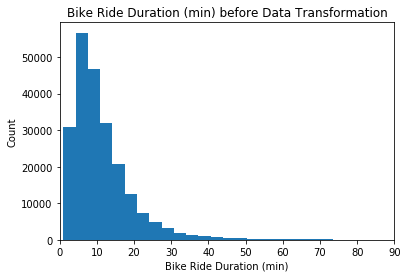

In [31]:
plt.hist(data = df, x = 'duration_min', bins = 30);
plt.xlim(0, 90);
plt.xlabel("Bike Ride Duration (min)");
plt.ylabel("Count");
plt.title("Bike Ride Duration (min) before Data Transformation");
plt.show()

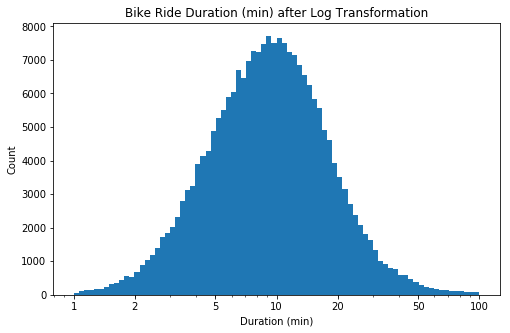

In [32]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.xlabel('Duration (min)');
plt.ylabel('Count');
plt.title("Bike Ride Duration (min) after Log Transformation");
plt.show()

## Bike ride Trends and Biker daily and weekly:
#####  The investigating is including start time hour,  start time dayofweek, member gender, and user type.


### the visualizations is showing the following:
* Tuesday, 5:00 PM has the highest biker counts across 7 days, 24 hours.
* 5:00 PM has the most male bikers compared to other hours. 8:00 AM and 5:00 PM have more female bikers compared to other hours.
* 5:00 PM has the most 'Subscriber' bikers compared to other hours. It also has the most 'Customer' bikers compared to other hours.
* Tuesday has the most male bikers compared to other days. It also has the most female bikers compared to other days.
* Tuesday has the most 'Subscriber' bikers compared to other days. Saturday has the most 'Customer' bikers compared to other days.
* Most 'Subscriber' are male. Most 'Customer' bikers are also male.
* We can see that there is gradual decrease in the number of riders as the days of the week pass. We can also notice that Tuesday is the day having the highest number of riders for all the categories.

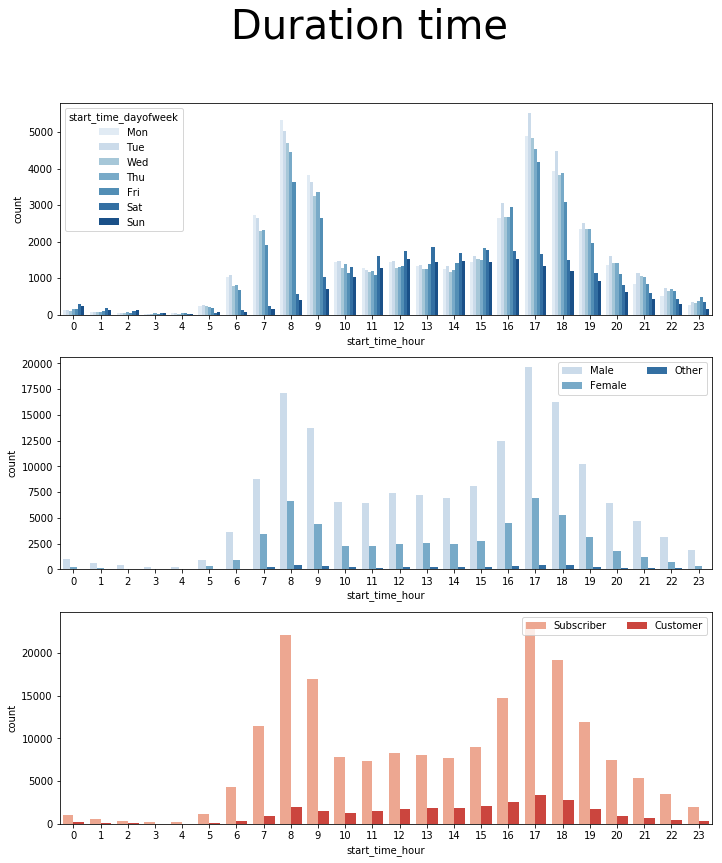

In [33]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize=[ 11.69, 13.27]);
plt.subplot(3, 1, 1);
sb.countplot(data = df, x = 'start_time_hour', hue = 'start_time_dayofweek', palette = 'Blues');

ax = plt.subplot(3, 1, 2);
sb.countplot(data = df, x = 'start_time_hour', hue = 'member_gender', palette = 'Blues');
ax.legend(ncol = 2); # re-arrange legend to reduce overlapping
ax = plt.subplot(3, 1, 3);
sb.countplot(data = df, x = 'start_time_hour', hue = 'user_type', palette = 'Reds');
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.suptitle("Duration time ",size=40)
plt.show()

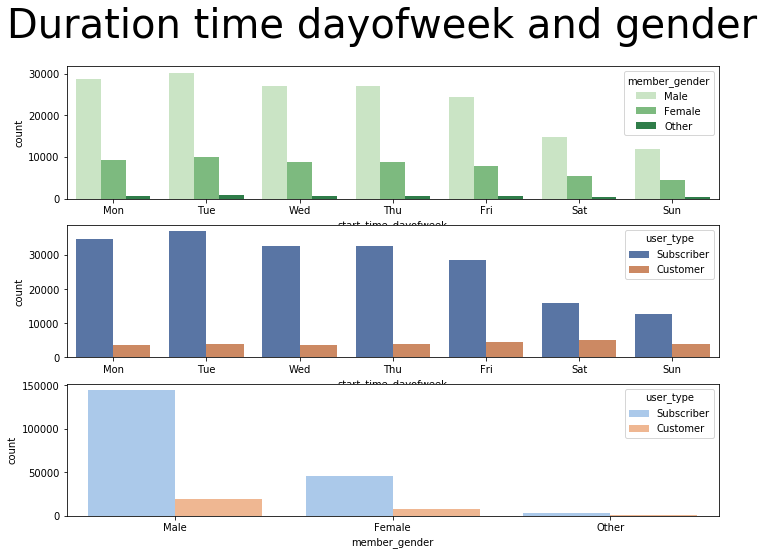

In [41]:
plt.figure(figsize=[ 11.69, 8.27]);

ax = plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'start_time_dayofweek', hue = 'member_gender', palette = 'Greens');

ax = plt.subplot(3, 1, 2);
sb.countplot(data = df, x = 'start_time_dayofweek', hue = 'user_type', palette = 'deep');

ax = plt.subplot(3, 1, 3);

sb.countplot(data = df, x = 'member_gender', hue = 'user_type', palette = 'pastel');
plt.suptitle("Duration time dayofweek and gender",size=40)
plt.show()

#### Lets see the most common start stations
    Most popular station will help us in knowing the station from where most of the trips are started

#### Observation
    We can see the top 10 names of the stations having most no of trips starting from. In the list San Francisco Caltrain Station 2  (Townsend St at 4th St) is at the top which means that it's the most popular start station

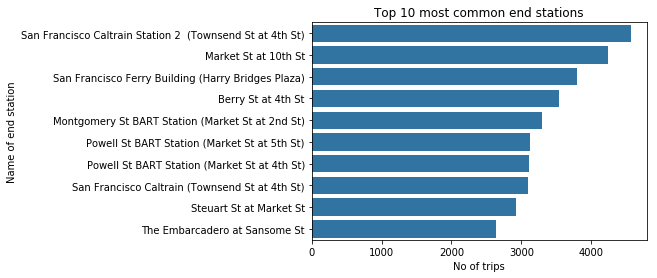

In [42]:
neighbourhood_counts = df['start_station_name'].value_counts()
neighbourhood_order = neighbourhood_counts.index
sb.countplot(data = df, y = 'start_station_name', order = neighbourhood_order[:10], color= default_color)
plt.xlabel('No of trips')
plt.ylabel('Name of end station')
plt.title('Top 10 most common end stations');


#### finding out where most trips end
    Lets see the most common end stations
    Most popular station will help us in knowing the station to where most of the trips are ended

#### Observation
    We can see the top 10 names of the stations having most no of trips ending at. In the list San Francisco Caltrain Station 2  (Townsend St at 4th St) is at the top which means that it's the most popular end station

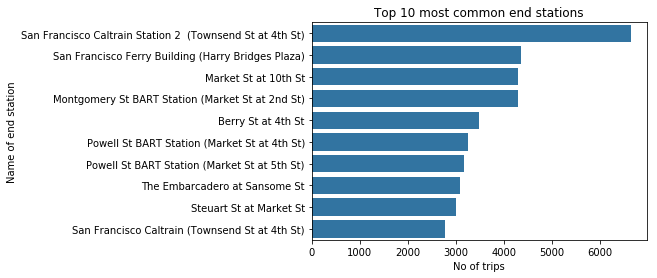

In [36]:
end_station = df['end_station_name'].value_counts()
neighbourhood_order = end_station.index
sb.countplot(data = df, y = 'end_station_name', order = neighbourhood_order[:10], color=default_color)
plt.xlabel('No of trips')
plt.ylabel('Name of end station')
plt.title('Top 10 most common end stations');


#### identifying the average duration of the road trip as travelled by people  age

###### Observation
    - people who ride the bike are between 20-60 ages
    - most ages who ride the bike are between 18-20
    - there is no one is older than 60 is using bike in Ford GoBike


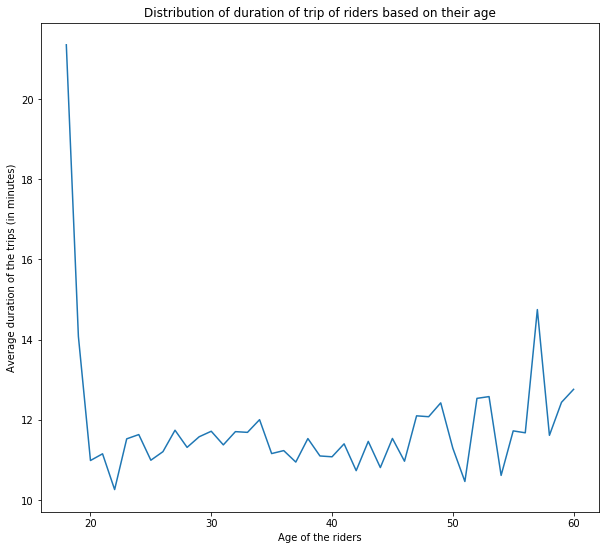

In [37]:
plt.figure(figsize=(10,9))
sb.lineplot(data=df[df['member_age']<100], x='member_age', y='duration_min', err_style=None)
plt.xlabel('Age of the riders')
plt.ylabel('Average duration of the trips (in minutes)')
plt.title('Distribution of duration of trip of riders based on their age');

##### start time of trips
* as we can see below, most of the trips start at 5pm
* second most trips start  at 8 am

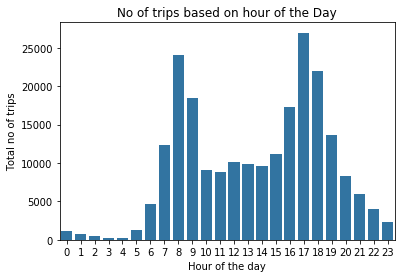

In [38]:
df.groupby('start_hour').count()
sb.countplot(data=df, x='start_hour', color=default_color);
plt.xlabel('Hour of the day')
plt.ylabel('Total no of trips')
plt.title('No of trips based on hour of the Day');

In [39]:
!jupyter nbconvert 'slide.ipynb' --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide.ipynb to slides
[NbConvertApp] Writing 556271 bytes to slide.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide.slides.html
Use Control-C to stop this server
^C

Interrupted
